In [51]:
print('hoda')

hoda


In [52]:
import numpy
import os



In [53]:
import os

real_count = len(os.listdir("dataset/real"))
fake_count = len(os.listdir("dataset/fake"))

print("  Number of Real:", real_count)
print(" Number of Fake:", fake_count)


  Number of Real: 6978
 Number of Fake: 6978


X

In [54]:
#Step 1: Import Libraries
import os
import librosa
import numpy as np

# Paths
real_path = "dataset/real"
fake_path = "dataset/fake"

X = []   # features
y = []   # labels

#Step 2: Preprocessing

# Function to extract MFCC features
def extract_features(file_path):
    y, sr = librosa.load(file_path, sr=16000)   # load audio
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)  # extract MFCCs
    mfcc = np.mean(mfcc.T, axis=0)  # take mean across time to reduce size
    return mfcc

# Process real audio (label = 0)
for file in os.listdir(real_path):
    file_path = os.path.join(real_path, file)
    features = extract_features(file_path)
    X.append(features)
    y.append(0)

# Process fake audio (label = 1)
for file in os.listdir(fake_path):
    file_path = os.path.join(fake_path, file)
    features = extract_features(file_path)
    X.append(features)
    y.append(1)

# Convert to numpy arrays
X = np.array(X)
y = np.array(y)

print("Shape of X (features):", X.shape)
print("Shape of y (labels):", y.shape)


Shape of X (features): (13956, 20)
Shape of y (labels): (13956,)


In [89]:
X

array([[-159.15465  ,   69.013855 ,  -24.30139  , ...,   -1.6907821,
         -12.04648  ,   -4.170325 ],
       [-181.14969  ,  101.52206  ,  -16.545155 , ...,   -2.3432863,
          -8.728118 ,   -3.4083452],
       [-178.86577  ,   70.01746  ,  -14.008171 , ...,   -7.242671 ,
         -10.442345 ,   -8.342333 ],
       ...,
       [-203.2837   ,  101.944984 ,   28.760866 , ...,    3.6852238,
          -8.911958 ,   -5.1887226],
       [-185.3693   ,   50.673904 ,   -9.381918 , ...,   -2.489033 ,
         -13.970686 ,   -4.413645 ],
       [-111.33813  ,   95.25883  ,  -30.96078  , ...,  -10.128829 ,
         -14.044191 ,    0.7977651]], shape=(13956, 20), dtype=float32)

In [56]:
np.save("X.npy", X)
np.save("y.npy", y)


In [57]:
from sklearn.model_selection import train_test_split

# Split dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set size:", X_train.shape, y_train.shape)
print("Testing set size:", X_test.shape, y_test.shape)


Training set size: (11164, 20) (11164,)
Testing set size: (2792, 20) (2792,)


In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train a simple Logistic Regression model
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7987106017191977

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.78      0.79      1396
           1       0.79      0.82      0.80      1396

    accuracy                           0.80      2792
   macro avg       0.80      0.80      0.80      2792
weighted avg       0.80      0.80      0.80      2792



In [59]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout

# Reshape for CNN (samples, timesteps, features)
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn  = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build CNN model
model = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Conv1D(64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # binary classification (real=0, fake=1)
])

# Compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



In [60]:

# Train
history = model.fit(X_train_cnn, y_train, validation_data=(X_test_cnn, y_test),
                    epochs=10, batch_size=32)

# Evaluate
loss, acc = model.evaluate(X_test_cnn, y_test)
print(f"Test Accuracy: {acc:.2f}")

Epoch 1/10
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5847 - loss: 1.0530 - val_accuracy: 0.7633 - val_loss: 0.5895
Epoch 2/10
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7082 - loss: 0.5736 - val_accuracy: 0.7962 - val_loss: 0.4796
Epoch 3/10
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7588 - loss: 0.5088 - val_accuracy: 0.8302 - val_loss: 0.4251
Epoch 4/10
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7891 - loss: 0.4533 - val_accuracy: 0.8592 - val_loss: 0.3516
Epoch 5/10
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8090 - loss: 0.4159 - val_accuracy: 0.8711 - val_loss: 0.3139
Epoch 6/10
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8291 - loss: 0.3782 - val_accuracy: 0.8840 - val_loss: 0.2726
Epoch 7/10
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8463 - loss: 0.3492 - val_accuracy: 0.8994 - val_loss: 0.2541
Epoch 8/10
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8578 - loss: 0.3364 - val_accuracy: 0.

In [61]:
model.save("deepfake_audio_cnn.h5")
from tensorflow.keras.models import load_model
model = load_model("deepfake_audio_cnn.h5")


88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 652us/step


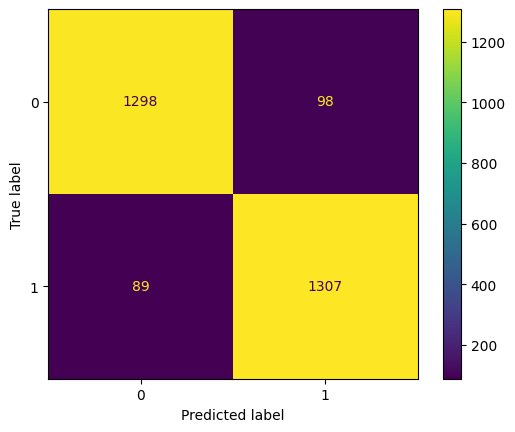

In [90]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_classes = (model.predict(X_test) > 0.5).astype("int32")
cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


In [63]:
#Make an inference function (audio_path, model.h5) -> real or fake with percentage (0.89)
/Users/hudakhaleel/sentinelai/sentinelai/dataset/fake/file9.mp3.wav_16k.wav_norm.wav_mono.wav_silence.wav_2sec.wav

NameError: name 'Users' is not defined

In [64]:
model.load(path=)


SyntaxError: expected argument value expression (4201685045.py, line 1)

In [19]:
#Make an inference function (audio_path, model.h5) -> real or fake with percentage (0.89)
from tensorflow.keras.models import load_model

# Load your saved CNN model
model = load_model("deepfake_audio_cnn.h5")

print("Model loaded successfully ")


Model loaded successfully 


In [23]:
def predict_audio(audio_path, model):
    import librosa, numpy as np
    
    # Load audio
    y, sr = librosa.load(audio_path, sr=16000)
    
    # Extract MFCC
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)
    mfcc = np.mean(mfcc.T, axis=0)  # average over time
    mfcc = mfcc.reshape(1, -1)      # reshape for model
    
    # Predict
    prob = model.predict(mfcc)[0][0]  
    label = "Fake" if prob > 0.5 else "Real"
    
    print(f"Prediction: {label} ({prob:.2f} confidence)")
    return label, prob




In [24]:
predict_audio("/Users/hudakhaleel/sentinelai/sentinelai/dataset/fake/file6.mp3.wav_16k.wav_norm.wav_mono.wav_silence.wav_2sec.wav", model)
predict_audio("/Users/hudakhaleel/sentinelai/sentinelai/dataset/real/file2.wav_16k.wav_norm.wav_mono.wav_silence.wav_2sec.wav",model)
predict_audio("/Users/hudakhaleel/Downloads/archive/for-norm/for-norm/validation/fake/file5.mp3.wav_16k.wav_norm.wav_mono.wav_silence.wav",model)
predict_audio("/Users/hudakhaleel/Downloads/archive/for-rerec/for-rerecorded/testing/real/recording13532.wav_norm_mono.wav",model)
predict_audio("/Users/hudakhaleel/Downloads/archive/for-rerec/for-rerecorded/testing/fake/recording13017.wav_norm_mono.wav",model)
predict_audio("/Users/hudakhaleel/Downloads/-7488867614957496932 2.wav",model)
predict_audio("/Users/hudakhaleel/Downloads/archive/for-2sec/for-2seconds/testing/fake/file2.wav_16k.wav_norm.wav_mono.wav_silence.wav_2sec.wav",model)
predict_audio("/Users/hudakhaleel/Downloads/archive/for-2sec/for-2seconds/testing/fake/file37.wav_16k.wav_norm.wav_mono.wav_silence.wav_2sec.wav",model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Prediction: Fake (1.00 confidence)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Prediction: Real (0.21 confidence)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Prediction: Fake (0.91 confidence)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Prediction: Real (0.18 confidence)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Prediction: Real (0.34 confidence)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Prediction: Fake (0.71 confidence)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Prediction: Real (0.41 confidence)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
Prediction: Real (0.41 confidence)


('Real', np.float32(0.40681636))

In [14]:
import librosa, soundfile as sf

y, sr = librosa.load("/Users/hudakhaleel/Downloads/-7488867614957496932 2.m4a", sr=16000)
sf.write("converted.wav", y, sr)
predict_audio("converted.wav", model)




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Prediction: Real (0.68 confidence)


/var/folders/k_/w30c5pr52md7kj9d__bfg6xr0000gn/T/ipykernel_67338/4093095509.py:3: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load("/Users/hudakhaleel/Downloads/-7488867614957496932 2.m4a", sr=16000)


('Real', 0.6831750273704529)

In [13]:
def predict_audio(audio_path, model):
    import librosa, numpy as np
    import soundfile as sf
    import os, tempfile

    # Always load with librosa (handles wav, mp3, flac, m4a, etc.)
    y, sr = librosa.load(audio_path, sr=16000)

    # Save to a temporary WAV (optional, ensures consistent format)
    tmp_wav = tempfile.mktemp(suffix=".wav")
    sf.write(tmp_wav, y, sr)

    # Reload the clean WAV (consistent for feature extraction)
    y, sr = librosa.load(tmp_wav, sr=16000)

    # Extract MFCC
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)
    mfcc = np.mean(mfcc.T, axis=0)
    mfcc = mfcc.reshape(1, -1)

    # Predict
    probs = model.predict(mfcc)[0]    # e.g., [0.2, 0.8]
    classes = ["Real", "Fake"]
    label = classes[np.argmax(probs)]
    confidence = float(np.max(probs))

    print(f"Prediction: {label} ({confidence:.2f} confidence)")
    return label, confidence


In [15]:
predict_audio("/Users/hudakhaleel/sentinelai/sentinelai/dataset/fake/file6.mp3.wav_16k.wav_norm.wav_mono.wav_silence.wav_2sec.wav", model)
predict_audio("/Users/hudakhaleel/sentinelai/sentinelai/dataset/real/file2.wav_16k.wav_norm.wav_mono.wav_silence.wav_2sec.wav",model)
predict_audio("/Users/hudakhaleel/Downloads/archive/for-norm/for-norm/validation/fake/file5.mp3.wav_16k.wav_norm.wav_mono.wav_silence.wav",model)
predict_audio("/Users/hudakhaleel/Downloads/archive/for-rerec/for-rerecorded/testing/real/recording13532.wav_norm_mono.wav",model)
predict_audio("/Users/hudakhaleel/Downloads/archive/for-rerec/for-rerecorded/testing/fake/recording13017.wav_norm_mono.wav",model)
predict_audio("/Users/hudakhaleel/Downloads/LibriSpeech/dev-clean/84/121123/84-121123-0002.flac",model)
predict_audio("/Users/hudakhaleel/Downloads/archive/for-2sec/for-2seconds/testing/fake/file2.wav_16k.wav_norm.wav_mono.wav_silence.wav_2sec.wav",model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Prediction: Real (1.00 confidence)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Prediction: Real (0.21 confidence)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Prediction: Real (0.91 confidence)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Prediction: Real (0.18 confidence)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Prediction: Real (0.34 confidence)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Prediction: Real (0.06 confidence)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Prediction: Real (0.68 confidence)


/var/folders/k_/w30c5pr52md7kj9d__bfg6xr0000gn/T/ipykernel_67338/124054854.py:7: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, sr=16000)


('Real', 0.6831750273704529)